<a href="https://colab.research.google.com/github/aleks-haksly/AI/blob/main/L1/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Введение в нейронные сети, Лекция 1

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential # импортируем класс создания модели (последовательный)
from keras.layers import Dense # импортируем полносвязные слои
from keras.optimizers import Adam

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

In [114]:
model = Sequential()
# 1. добавляем полносвязный слой с 2 входами и 2 выходами
model.add(Dense(2,input_dim=2, use_bias=False))
# 2. далее еще один слой число входов авто, число выходов 1.
model.add(Dense(1, use_bias=False))

In [ ]:
#use_bias=True значит, что outputs = inputs * weights + вектор bias. В нашем случае мы это не спользуем и ветор bias не обучаем

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Non-trainable params: параметры, которые не требуется изменять при обучении модели

In [ ]:
# При создании модели веса генерируются автоматически случайным образом.
weights = model.get_weights()
weights

[array([[-0.938197  ,  0.3325677 ],
        [ 0.47722435,  0.62399673]], dtype=float32),
 array([[-1.1470376],
        [ 0.7140368]], dtype=float32)]

In [ ]:
# Также их можно установить вручную
w1 = 0.42
w2 = 0.15
w3 = -0.56
w4 = 0.83
w5 = 0.93
w6 = 0.02
# Веса в 1 и 2 слоях
L1 = np.array([[w1, w3],[w2, w4]])
L2 = np.array([[w5,], [w6,]])
new_weights = [L1, L2]
model.set_weights(new_weights)

In [ ]:
model.get_weights()

[array([[ 0.42, -0.56],
        [ 0.15,  0.83]], dtype=float32),
 array([[0.93],
        [0.02]], dtype=float32)]

In [ ]:
# Положим входные значения равны:
X1 = 7.2
X2 = -5.8

In [ ]:
# создаем входной набор данных
x_train  = np.expand_dims(np.array([X1, X2]), 0) # ~reshape чтобы был двумерный набор, для этого добавляем ось
x_train

array([[ 7.2, -5.8]])

In [ ]:
model.predict(x_train) # Предикт от модели, также он просто равен произведению матриц

1/1 [==============================] - 0s 84ms/step


array([[1.8262998]], dtype=float32)

In [ ]:
np.matmul(np.array([X1, X2]), L1) # То же, что и np.array([X1, X2]) @ L1

array([ 2.154, -8.846])

In [ ]:
np.array([X1, X2]) @ L1 @ L2 # Предикт от модели, также он просто равен произведению матриц

array([1.8263])

### Функция активации ###
Если бы функция активации нейронов была бы линейной, но можно было выполнить преобразование: Output = Input * W1 * W2 при этом $\exists$ W3 -> W3 = W1 * W2. То есть использование нескольких слоев не имело бы смысла. Но она не линейна.
Чаще всего используют ф-ции:

In [ ]:
def sigmoid(x: float) -> float:
  return 1 / (1 + np.exp(-x))

<Axes: >

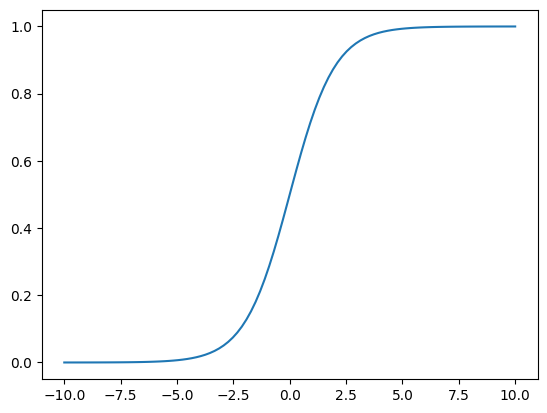

In [ ]:
# sigmoid сигмоид
sns.lineplot(x=np.linspace(-10, 10, 100), y = [sigmoid(x) for x in np.linspace(-10, 10, 100)])

<Axes: >

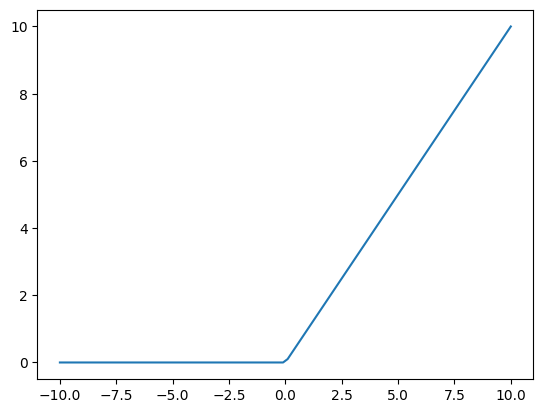

In [ ]:
#relu линейный выпрямитель ! самая быстрая
def relu(x: float) -> float:
  return np.clip(x, 0, np.inf)
sns.lineplot(x=np.linspace(-10, 10, 100), y = [relu(x) for x in np.linspace(-10, 10, 100)])

<Axes: >

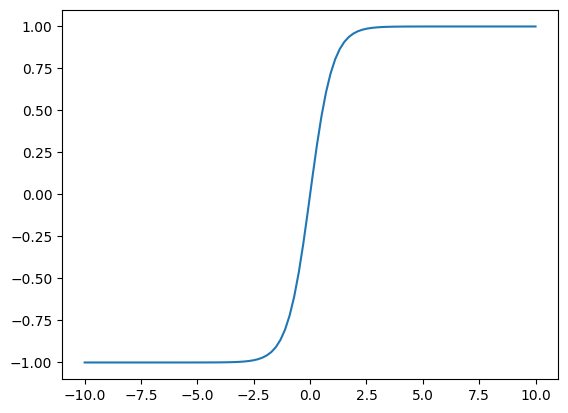

In [ ]:
# tanh гиперболический тангенс
def tanh(x: float) -> float:
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
sns.lineplot(x=np.linspace(-10, 10, 100), y = [tanh(x) for x in np.linspace(-10, 10, 100)])

In [ ]:
#softmax

In [ ]:
# Проверим, как руками посчитать с функциями активации:

In [ ]:
# сначала моделью, для референса
model_sigmoid = Sequential()
model_sigmoid.add(Dense(2, input_dim=2, activation='sigmoid', use_bias=False))
model_sigmoid.add(Dense(1, activation='sigmoid', use_bias=False))

In [ ]:
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 4         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Используем те же веса
model_sigmoid.set_weights([L1, L2])
model_sigmoid.get_weights()

[array([[ 0.42, -0.56],
        [ 0.15,  0.83]], dtype=float32),
 array([[0.93],
        [0.02]], dtype=float32)]

In [ ]:
# Результат модели
model_sigmoid.predict(x_train)

1/1 [==============================] - 0s 73ms/step


array([[0.6970569]], dtype=float32)

In [ ]:
# Теперь руками, ответ тот же:
sigmoid(sigmoid(x_train @ L1) @ L2)

array([[0.69705687]])

In [ ]:
# считаем руками relu
# Считаем руками, ответ тот же, что при activation='relu':
relu(relu(x_train @ L1) @ L2)

array([[2.00322]])

In [ ]:
# считаем руками tanh
# Считаем руками, ответ тот же, что при activation='tanh':
tanh(tanh(x_train @ L1) @ L2)

array([[0.7090626]])

In [ ]:
# кроме того, в activation= можно передавать любую свою ф-цию

### Функции ошибок (loss functions)<br>
$$MAE = \frac{ \sum_{i=1}^n |y_i - \hat{y_i}|}{n}$$ <br>
$$MSE = \frac{ \sum_{i=1}^n (y_i - \hat{y_i})^2}{n}$$ <br>
$$H_p(q) = - \frac{ \sum_{i=1}^n (y_i*log(p(y_i)) + (1-y_i)*log(1-p(y_i)))}{n}$$ - бинарная кросс энтропия (классификация)
и много других (keras.io/losses/)


Функция ошибки L является функцией от модели: <br>
$$L = f(Y, \hat{Y})$$ <br> $$\hat{Y} = model(X, W)$$ <br>
$$L = f(Y, X, W)$$ <br>
Изменяемая часть - только вектор весов $W$, тогда <br>
$$L = f(W)$$

### Оптимайзеры
1. Adam
2. RMSprop
3. Adadelta <br>
learning_rate - шаг оптимизации <br>
Варианты: SGD, Adagrad, Adamax, Nadam
<br>
Gradient descend
<br>
![Gradient descend](https://drive.google.com/uc?export=view&id=1VY00Wk5MxpXjW6Oe34oO6g9cE1YvdewQ)

Новые веса вычисляются по схеме
$w' = w - \frac{\partial L}{\partial w} $

In [ ]:
#Пример работы
y_true = 0.34
y_train = np.array([y_true])
y_train.shape

(1,)

In [ ]:
# Создадим модель
model_test = Sequential()
model_test.add(Dense(2, input_dim = 2, activation='relu', use_bias=False))
model_test.add(Dense(1, activation='relu', use_bias=False))
model_test.set_weights(new_weights)

In [ ]:
#model_test.compile(optimizer=Adam(0.001), loss='mse')
model_test.compile(optimizer='adam', loss='mse', metrics=['mae']) # метрику выбираем MAE, так как она более наглядная

In [ ]:
l = model_test.train_on_batch(x_train, y_train) # тренируем модель. Получаем ошибку и метрику
print(x_train)
print(y_train)
print(model_test.predict(x_train)[0][0])

[[ 7.2 -5.8]]
[0.34]
1/1 [==============================] - 0s 68ms/step
1.9889889


In [ ]:
print("loss (MSE): {0}, metrics (MAE): {1}".format(*l))

loss (MSE): 2.7663002014160156, metrics (MAE): 1.6632198095321655


In [ ]:
# Первоначальные веса:
new_weights

[array([[ 0.42, -0.56],
        [ 0.15,  0.83]]),
 array([[0.93],
        [0.02]])]

In [ ]:
# Веса в процессе обучения начали меняться (после 1 цикла обучения):
model_test.get_weights()

[array([[ 0.419, -0.56 ],
        [ 0.151,  0.83 ]], dtype=float32),
 array([[0.929],
        [0.02 ]], dtype=float32)]

In [ ]:
# Проведем 1000 циклов обучения:
weights = []
losses = []
for _ in range(1000):
  l = model_test.train_on_batch(x_train, y_train)
  losses.append(l) # сохраним промежуточные значения функции ошибки и метрики
  weights.append(model_test.get_weights()) # сохраним промежуточные значения весов

In [ ]:
df_losses = pd.DataFrame(losses, columns=['MSE_loss', 'MAE_metric']) # Для удобсва сохраним loss и metric в DataFrame
df_weights = pd.DataFrame(weights).applymap(lambda x: sum(x.tolist(), [])) # Для удобсва сохраним веса в DataFrame

Text(0.5, 1.0, 'Ошибка в log шкале')

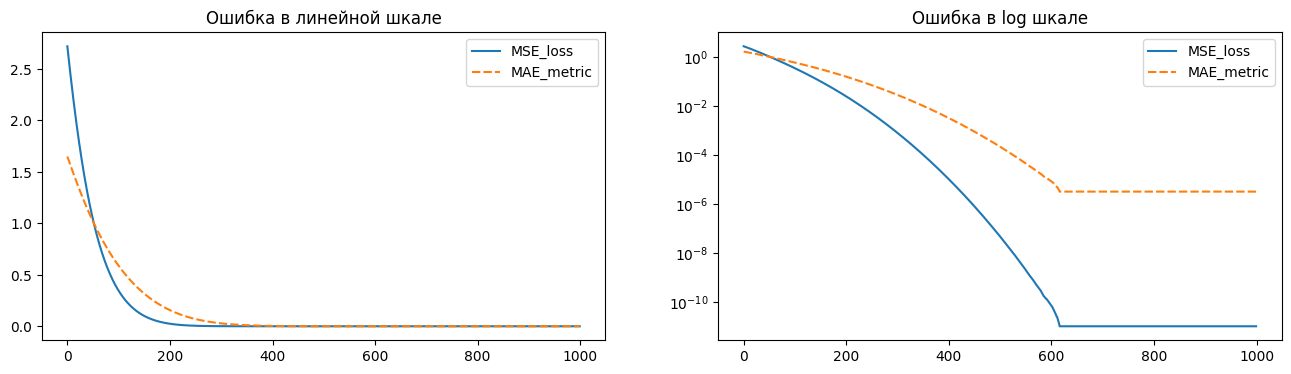

In [ ]:
# Посмотрим, как менялась ошибка в процессе обучения в нормальной и log шкале
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.lineplot(df_losses, ax = axes[0]).set_title("Ошибка в линейной шкале")
plt.yscale('log')
sns.lineplot(df_losses, ax = axes[1]).set_title("Ошибка в log шкале")

<Axes: >

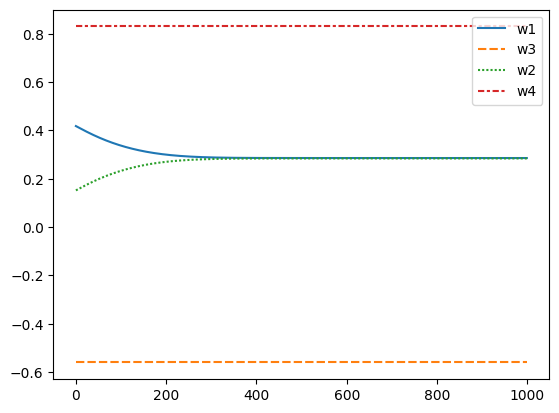

In [ ]:
# посмотрим, как менялись веса в 1 слое в процессе обучения
sns.lineplot(pd.DataFrame(df_weights[0].tolist()).rename(columns={0: 'w1', 1: 'w3', 2: 'w2', 3: 'w4'}))

In [ ]:
# This plotly graph is not displayed on GitHub
fig = px.line(pd.DataFrame(df_weights[0].tolist()).rename(columns={0: 'w1', 1: 'w3', 2: 'w2', 3: 'w4'}), y=['w1', 'w3', 'w2', 'w4'])
fig.show()

<Axes: >

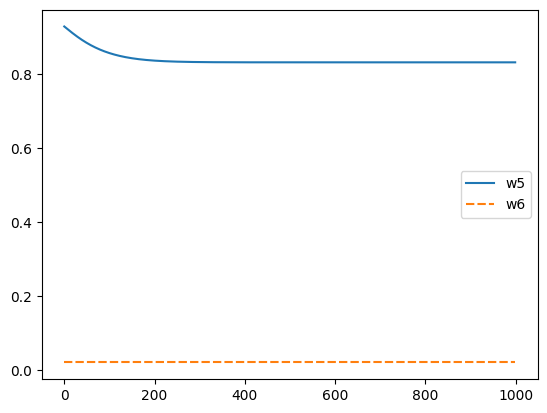

In [ ]:
# посмотрим, как менялись веса во 2 слое в процессе обучения
sns.lineplot(pd.DataFrame(df_weights[1].tolist()).rename(columns={0: 'w5', 1: 'w6'}))

In [ ]:
# This plotly graph is not displayed on GitHub
fig = px.line(pd.DataFrame(df_weights[1].tolist()).rename(columns={0: 'w5', 1: 'w6'}), y=['w5', 'w6'])
fig.show()

In [ ]:
# Видим, что поменялись только w1, w2, w5

## Визуализация градиентного спуска ##

In [3]:
def makeData(model, x_train, y_train): # Функция возвращает сетку координат весов и массив ошибки, соответствующей этой сетке
    x = np.arange(-1.5, 1.5, 0.1) # Создаем массив шагов по шкале x
    y = np.arange(-1.5, 1.5, 0.1) # Создаем массив шагов по шкале y
    xgrid, ygrid = np.meshgrid(x, y) # Создаем пересечение всех возможных точек пространства  xy
    zgrid = np.zeros_like(xgrid) # Сздаем массив zgrid (в нем будет храниться значение ошибки)
    for i in range (x.shape[0]): # Проходим по всем шагам по оси x
      z_add = np.zeros(x.shape[0]) # Создаем массив из нулей, в который будем добавлять значения ошибки
      for j in range(y.shape[0]): # Проходим по всем шагам по оси y
        model_d.set_weights([np.array([[x[i]],[y[j]]])]) # Устанавливаем веса для модели в соответствии с текущими шагами по осям x и y
        loss = model_d.train_on_batch(x_train, y_train) # Обучаем модель на установленных весах и получаем значение ошибки
        z_add[j] = loss # Записываем полученное значение ошибки в соответствующее место массива z_add
      zgrid[i] = z_add # Записываем сформированный массив z_add в общий массив, хранящий значение ошибки
    return xgrid, ygrid, zgrid # Возвращаем шаги по осям x и y (xgrid, ygrid) и массив, содержащий значение ошибки (zgrid)

In [4]:
model_d = Sequential() # Создаем класс модели
model_d.add(Dense(1, input_dim=2, activation='linear', use_bias=False)) # Добавляем один Dense-слой с линейной активацией и отключенным bias'ом
model_d.compile(optimizer=Adam(0.001), loss='mse') # Компилируем модель, указав оптимайзер и ошибку

In [5]:
start_weights = [np.array([[-1.2], [1.1]])] # Зададим свои стартовые веса модели
model_d.set_weights(start_weights) # Установим модели указанные веса

In [6]:
x_train = np.array([[1,0],[0,1]]) # Зададим x_train
y_train = np.array([1,-1]) # Зададим y_train

In [ ]:
x, y, z = makeData(model_d, x_train, y_train) # Вызываем функцию получения сетки весов и значений ошибки в этих весах

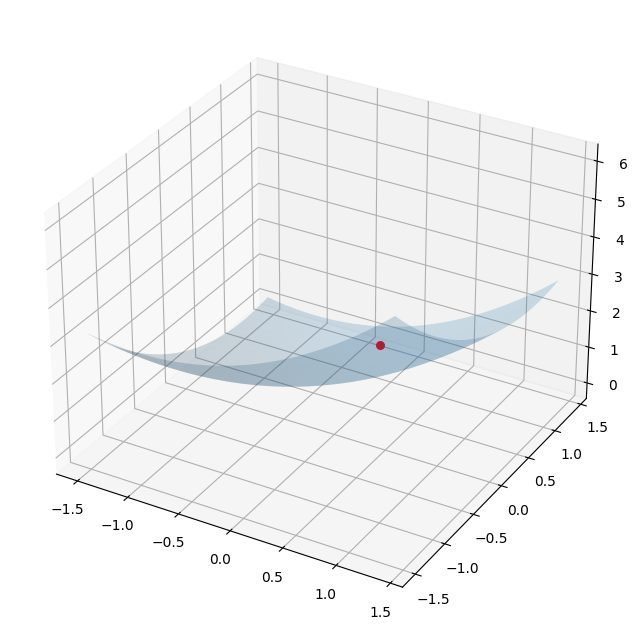

In [12]:
model_d.set_weights(start_weights) # Устанвливаем модели стартовое значение весов
l = model_d.train_on_batch(x_train, y_train) # Получим значение ошибки при стартовых весах
fig = plt.figure(figsize=(8,8)) # Создаем объект pylab.figure для построения графиков
axes = fig.add_subplot(projection='3d') # Создаем объект Axes3D для построения трехмерного графика
axes.plot_surface(x, y, z, rstride=1, cstride=1, alpha = 0.2) # Рисуем поверхность по параметрам x (веса w1), y (веса w2), z (значения ошибок)
axes.scatter(start_weights[0][1], start_weights[0][0], l, s=30, color='red') # Рисуем стартовое значение ошибки (l) при стартовых весах
plt.show() # Отображаем график

In [15]:
save_weights = [] # Создаем пустой список, в котором будем сохранять веса модели после каждого шага обучения
losses = [] # Создаем пустой список, в котором будем сохранять значение ошибки после каждого шага обучения
for i in range(4000): # Проходим в цикле 4000 раз
  save_weights.append(model_d.get_weights()[0]) # Добавляем в список весов текущее значение весов модели
  l = model_d.train_on_batch(x_train, y_train) # Обучаем модель методом train_on_batch и получаем значение ошибки
  losses.append(l) # Добавляем полученное значение ошибки в список ошибок
print(l) # Выведем ошибку после последнего шага обучения

0.0003499252488836646


In [16]:
save_weights = np.array(save_weights) # Преобразуем список save_weights в numpy-массив
save_weights = save_weights.reshape(-1,2) # Изменим размерность сформированного массива
print(save_weights[-1]) # Отобразим последнее значение в массиве (соответствует текущим весам модели)
print(losses[-1]) # Отобразим последнее значение в списке ошибок

[ 0.9794484  -0.98334223]
0.0003499252488836646


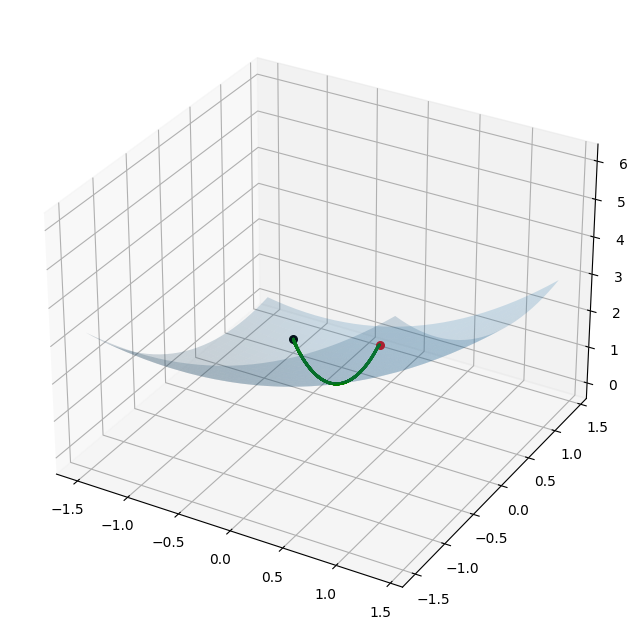

In [17]:
fig = plt.figure(figsize=(8,8)) # Создаем объект pylab.figure для построения графиков
axes = fig.add_subplot(projection='3d') # Создаем объект Axes3D для построения трехмерного графика
axes.plot_surface(x, y, z, rstride=1, cstride=1, alpha = 0.2) # Рисуем поверхность по параметрам x (веса w1), y (веса w2), z (значения ошибок)
axes.scatter(save_weights[0,1], save_weights[0,0], losses[0], s=30, color='red') # Рисуем стартовое значение ошибки (losses[0])
axes.scatter(save_weights[:,1], save_weights[:,0], losses[:], s=1, color='green') # Рисуем все значения ошибок
axes.scatter(save_weights[-1,1], save_weights[-1,0], losses[-1], s=30, color='black') # Рисуем финальное значение ошибки (losses[-1])
plt.show()